In [259]:
from turtledemo.penrose import start

from IPython.core.inputtransformer2 import TokenTransformBase
from PIL.ImageOps import scale
from lib2to3.btm_utils import syms
from networkx.algorithms.bipartite.basic import color
from numpy.ma.core import angle, mean

from sympy import resultant, symbols, poly
%matplotlib inline

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
# Write your imports here

# Linear Algebra Exercise
## Functions, Polynomials, Vectors, Matrices, Transformations

### Problem 1. Polynomial Interpolation
We know that if we have a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, we can try to figure out what function may have generated these points.

Please note that **our assumptions about the data** will lead us to choosing one function over another. This means that our results are as good as our data and assumptions. Therefore, it's extremely important that we write down our assumptions (which sometimes can be difficult as we sometimes don't realize we're making them). It will be better for our readers if they know what those assumptions and models are.

In this case, we'll state two assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

This method is called *polynomial interpolation* (*"polynomial"* captures assumption 1 and *"interpolation"* captures assumption 2).

It can be proved (look at [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation) for example) that if we have $n$ data points, there is only one polynomial of degree $n-1$ which passes through them. In "math speak": "the vector spaces of $n$ points and polynomials of degree $n-1$ are isomorphic (there exists a bijection mapping one to the other)".

There are a lot of ways to do interpolation. We can also write the function ourselves if we want but this requires quite a lot more knowledge than we already covered in this course. So we'll use a function which does this for us. `numpy.polyfit()` is one such function. It accepts three main parameters (there are others as well, but they are optional): a list of $x$ coordinates, a list of $y$ coordinates, and a polynomial degree.

Let's say we have these points:
```python
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
```

First, we need to "extract" the coordinates:
```python
x = points[:, 0]
y = points[:, 1]
```

Then, we need to calculate the interpolating polynomial. For the degree, we'll initially set $n-1$:
```python
poly = np.polynomial.polynomial.Polynomial.fit(...)
# TODO: Find a way to make the line shorter; call the correct arguments
```

After that, we need to plot the function. To do this, we'll create a range of $x$ values and evaluate the polynomial at each value:
```python
plot_x = np.linspace(np.min(x), np.max(x), 1000) # If you want, pass the number of points as a parameter
plot_y = poly(plot_x)
```

Finally, we need to plot the result. We'll plot both the fitting polynomial curve (using `plt.plot()`) and the points (using `plt.scatter`). It's also nice to have different colors to make the line stand out from the points.
```python
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```
Don't forget to label the axes!

In [261]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
x = points[:, 0]
y = points[:, 1]

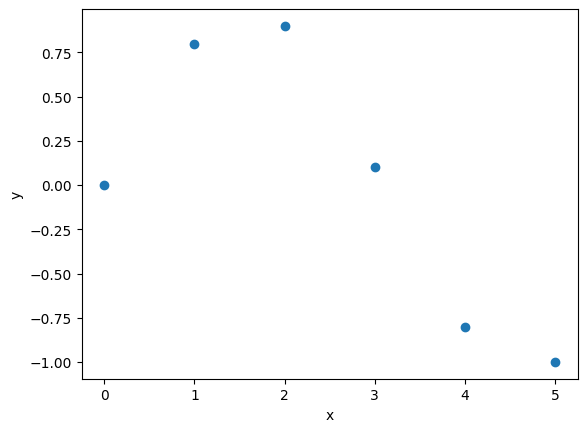

In [262]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [263]:
poly = np.polynomial.polynomial.Polynomial.fit(x, y, deg=len(points) - 1)
poly

Polynomial([ 0.57421875, -2.09505208, -1.88802083,  2.40885417,  0.81380208,
       -0.81380208], domain=[0., 5.], window=[-1.,  1.], symbol='x')

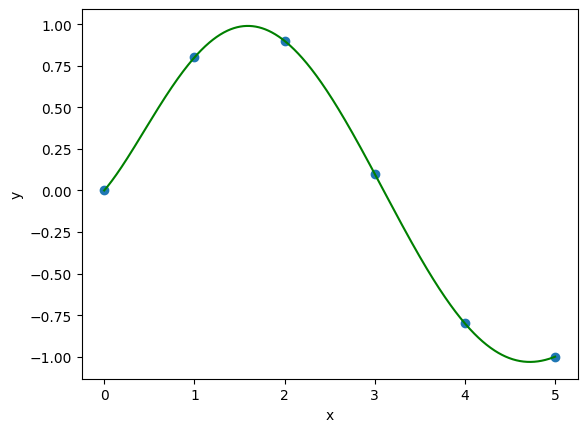

In [264]:
plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)

plt.plot(plot_x, plot_y, c='green')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Your task now is to **wrap the code in a function**. It should accept a list of points, the polynomial degree, min and max value of $x$ used for plotting. 

**Be extremely careful to ensure that the function uses its parameters!** Of course, you can extract other utility functions if you wish (e.g., separating plotting from the rest is a good idea).

We'll use this function to try some other cases.

In [265]:
def interpolate_polynomial(points, degree, min_x, max_x):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """
    x = points[:, 0]
    y = points[:, 1]
    poly = np.polynomial.polynomial.Polynomial.fit(x, y, deg=degree)

    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = poly(plot_x)

    plt.plot(plot_x, plot_y, c='green')
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

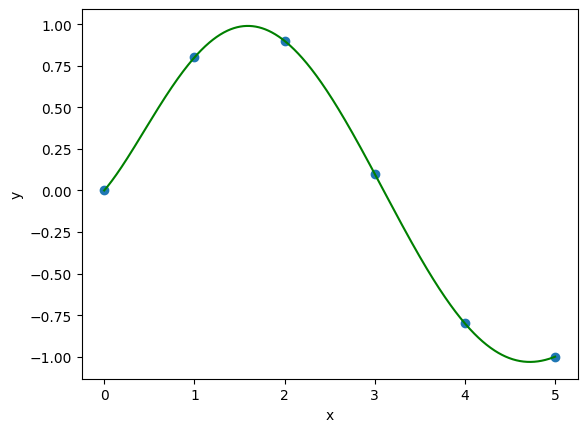

In [266]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see this is a very nice fit. This is expected, of course. Let's try to expand our view a little. Let's try to plot other values of $x$, further than the original ones. This is **extrapolation**.

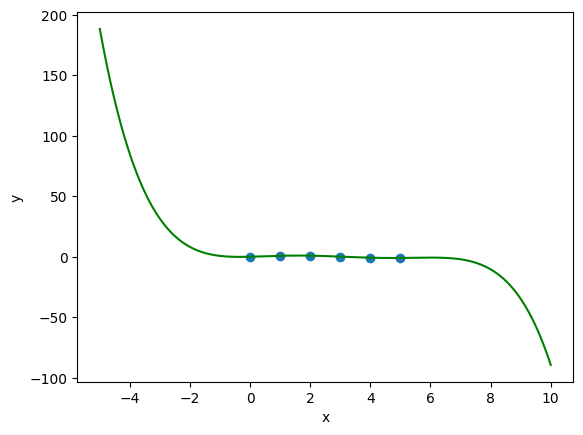

In [267]:
interpolate_polynomial(points, len(points) - 1, -5, 10)

Hmmm... it seems our polynomial goes a little wild outside the original range. This is to show how **extrapolation can be quite dangerous**.

Let's try a lower polynomial degree now. We used 4, how about 3, 2 and 1?
**Note:** We can add titles to every plot so that we know what exactly we're doing. Te title may be passed as an additional parameter to our function.

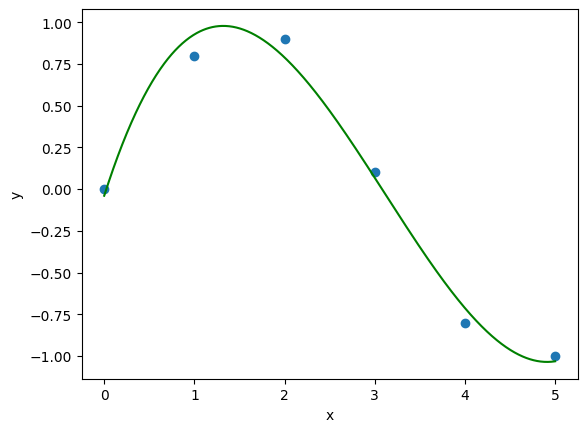

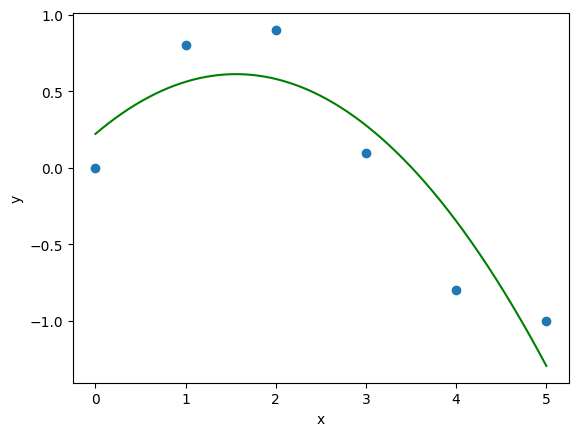

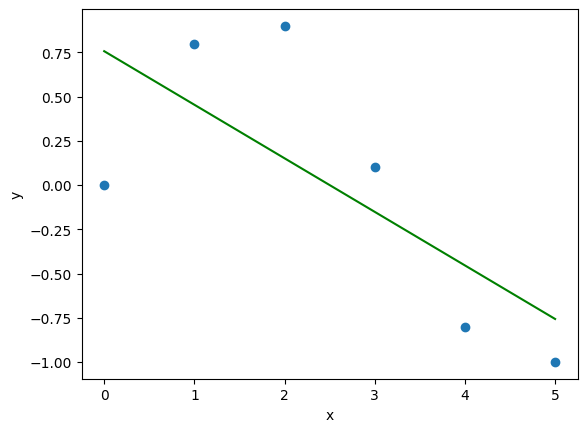

In [268]:
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see the fitting curves (or line in the last case) struggle more and more and they don't pass through every point. This breaks our assumptions but it can be very useful.

Okay, one more thing. How about increasing the degree? Let's try 5, 7 and 10. Python might complain a little, just ignore it, everything is fine... sort of :).

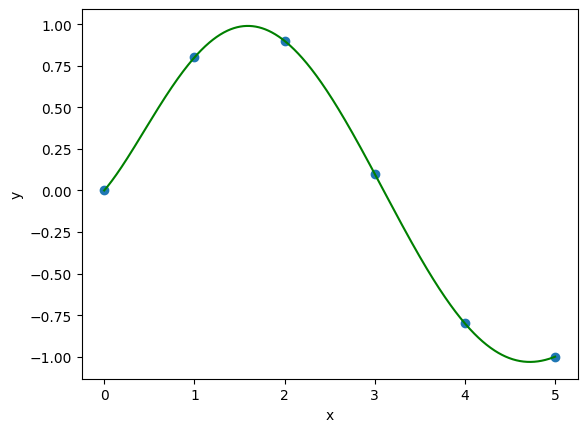

C:\Users\sveto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


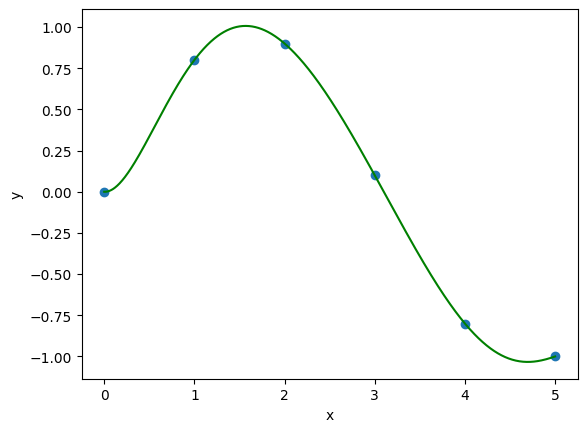

C:\Users\sveto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


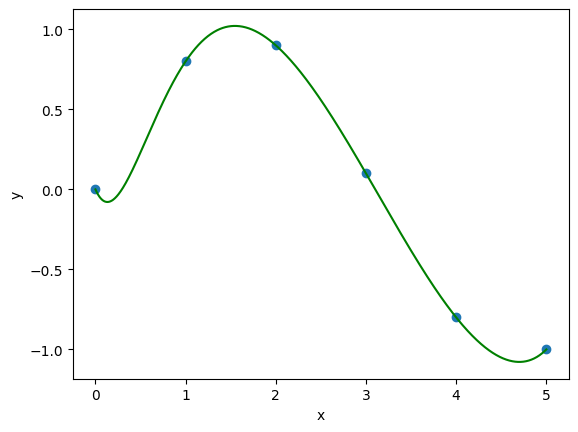

In [269]:
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]))

Those graphs look pretty much the same. But that's the point exactly. I'm being quite sneaky here. Let's try to expand our view once again and see what our results really look like.

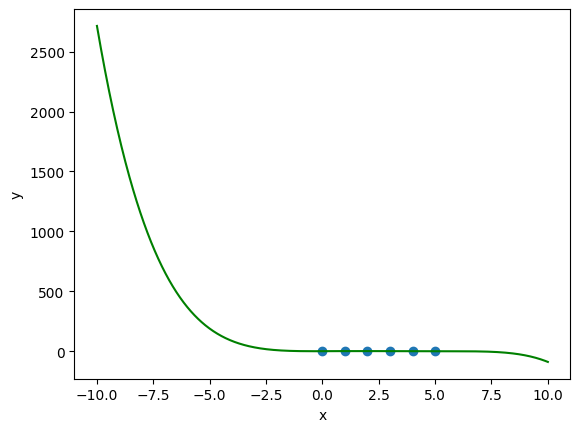

C:\Users\sveto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


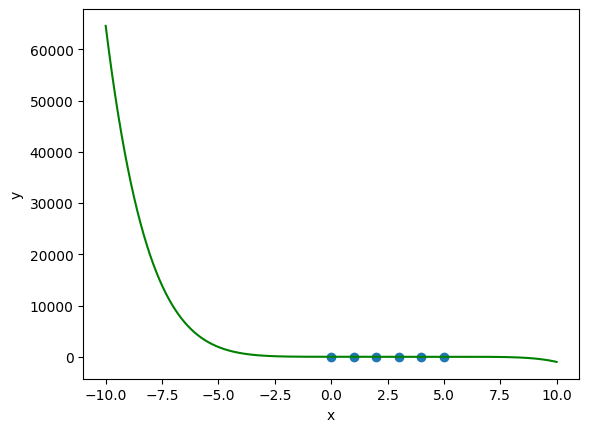

C:\Users\sveto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


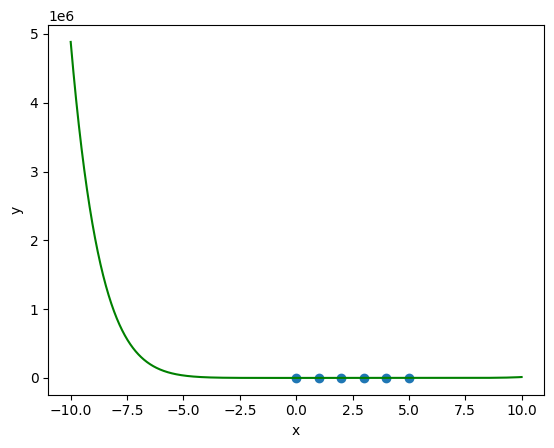

In [270]:
interpolate_polynomial(points, 5, -10, 10)
interpolate_polynomial(points, 7, -10, 10)
interpolate_polynomial(points, 10, -10, 10)

Now we see there are very wild differences. Even though the first two plots look quite similar, look at the $y$ values - they're quite different.

So, these are the dangers of interpolation. Use a too high degree, and you get "the polynomial wiggle". These are all meant to represent **the same** data points but they look insanely different. Here's one more comparison.

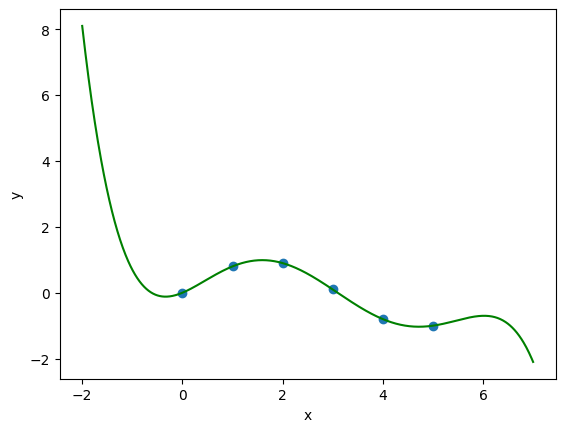

C:\Users\sveto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


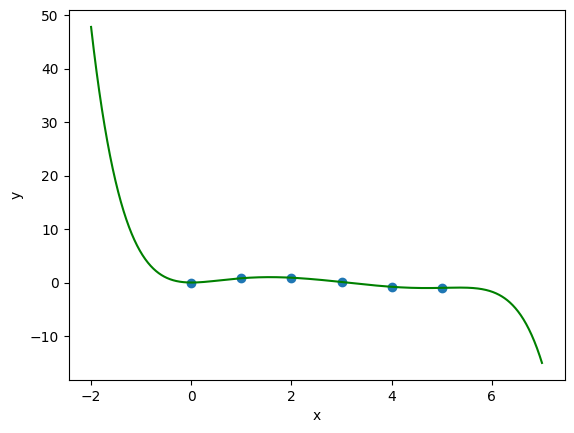

In [271]:
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

Now we can see what big difference even a small change in degree can make. This is why we have to choose our interpolating functions very carefully. Generally, a lower degree means a simpler function, which is to be preferred. See [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

To illustrate this, let's use the following set of points. What degree do you think would be the most reasonable? What are the coefficents of the interpolation?

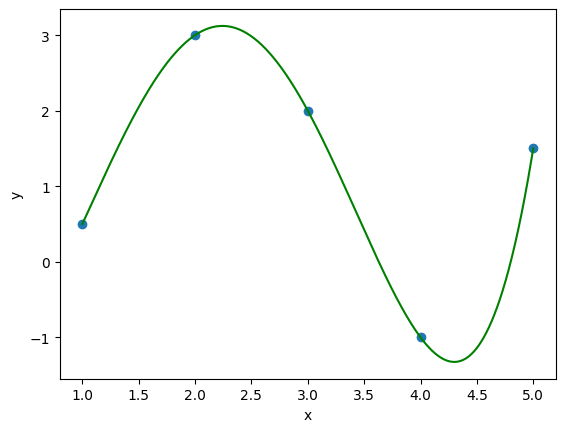

In [272]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

Now let's add one more point. What can you observe now?

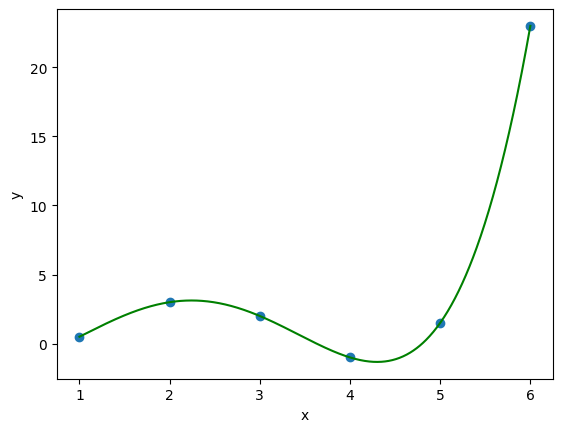

In [273]:
points = np.array([(1, 0.5), (2, 3), (3, 2), (4, -1), (5, 1.5), (6, 23)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

Finally, **we need to be very careful about our assumptions**. Have a look at this situation:

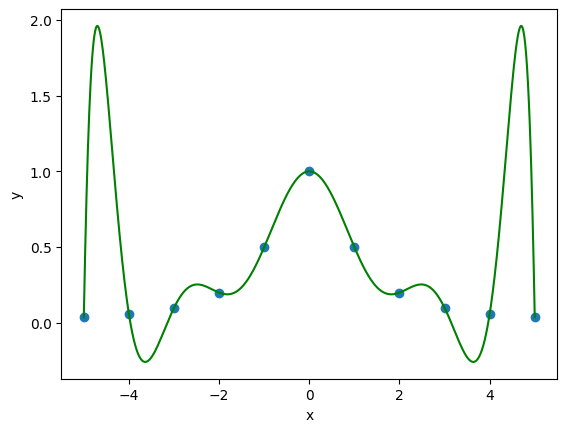

In [274]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This plot definitely looks strange... This is because the generating function is not a polynomial. It's actually:
$$ y = \frac{1}{1 + x^2} $$

Plot the polynomial interpolation and the real generating function **on the same plot**. You may need to modify the original plotting function or just copy its contents.

In [275]:
res_func = np.polynomial.polynomial.Polynomial.fit(points[:, 0], points[:, 1], deg=len(points) - 1)
res_func

Polynomial([ 1.00000000e+00,  4.52850308e-13, -1.68552032e+01, -2.81886025e-12,
        1.23359714e+02,  4.88829543e-12, -3.81433706e+02, -9.02925413e-13,
        4.94909216e+02, -1.79826719e-12, -2.20941560e+02], domain=[-5.,  5.], window=[-1.,  1.], symbol='x')

In [276]:
def interpolate_polynomial(points, degree, min_x, max_x):
    x = points[:, 0]
    y = points[:, 1]
    poly = np.polynomial.polynomial.Polynomial.fit(x, y, deg=degree)

    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = poly(plot_x)

    plt.plot(plot_x, plot_y, c='green')
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

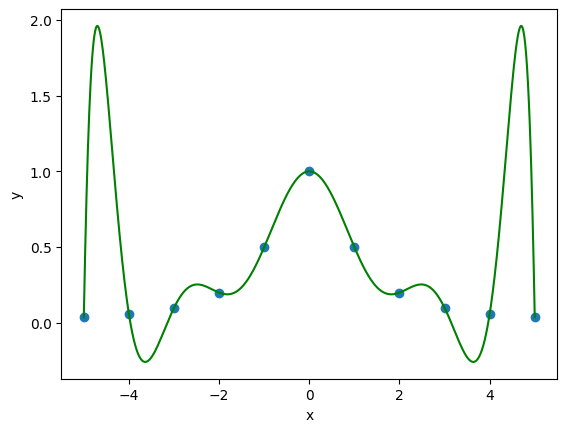

In [277]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

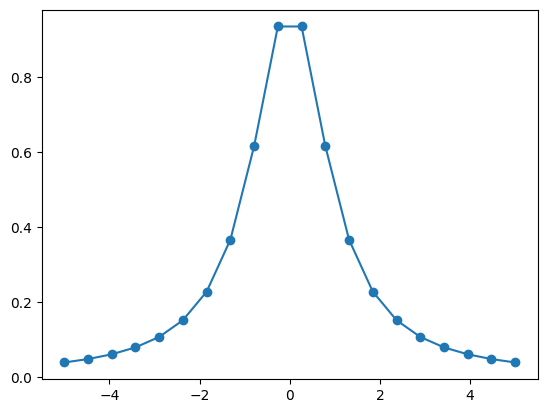

In [278]:
plot_x = np.linspace(np.min(points[:, 0]), np.max(points[:, 0]), 20)
plot_y = 1 / (1 + plot_x ** 2)
plt.plot(plot_x, plot_y)
plt.scatter(plot_x, plot_y)
plt.show()

### Problem 2. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [279]:
from collections import deque
import re

def encode(text):
    d = deque(list(text))
    first_symb = d.popleft()
    result = []

    current_symbol = f'{first_symb}'
    while d:
        symb = d.popleft()

        if current_symbol[-1] != symb:
            result.append((current_symbol[-1], len(current_symbol)))
            current_symbol = ''
            current_symbol += symb
        else:
            current_symbol += symb

        if not d:
            result.append((current_symbol[-1], len(current_symbol)))
            break

    return ''.join(f"{char}{count}" if count > 1 else char for char, count in result)

def decode(text):
    """
    Decodes the text using run-length encoding
    """
    pattern = r"[A-Za-z]\d*"
    matches = re.findall(pattern, text)
    result = []

    for i in matches:
        result.append(i[0] * int(i[1:] if i[1:] else 1))

    return ''.join(result)

In [280]:
# Tests
# Test that the functions work on their own
assert encode("AABCCCDEEEE") == "A2BC3DE4"
assert decode("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"

### * Problem 3 Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment. We'll also get to know what _performance testing_ is, which is really useful when we work with huge amounts of data. 

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example; although you may find a more accurate function.

Specify a sequence of _bit lengths_ (`n_bits`), in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computing power you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing. For better results, you may want to generate many numbers for every bit length and average the results.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

In [281]:
import random
random.getrandbits(10)

261

In [282]:
from sympy.ntheory import factorint
result = factorint(9989751032969399012312312312332423423535475686793468585675675675345345)
result

{3: 1,
 5: 1,
 853: 1,
 953: 1,
 177347: 1,
 5466070161743: 1,
 49761292551991: 1,
 16983639898191406112171562703777: 1}

In [283]:
import time

start = time.perf_counter()
factorint(9989751032969399012312312312332423423535475686793468585675675675345345)
end = time.perf_counter()
final_time_1 = end - start

print(f"It took: {final_time_1} seconds")

It took: 0.00012629999946511816 seconds


In [284]:
import math

start = time.perf_counter()
final_res = math.prod(k ** v for k, v in result.items())
end = time.perf_counter()
final_time_2 = end - start

print(f"It took: {final_time_2} seconds")

It took: 0.00013919999946665484 seconds


In [285]:
final_time_1 / final_time_2

0.9073275858407825

### Problem 4. Basis Vectors in 2D Coordinate Space
We know that for an n-dimensional vector space, we need **exactly n** vectors to form a basis. Let's visualize that.

The function you wrote last time for visualizing complex numbers can be extended to visualize any set of vectors. If you haven't already written that, have a look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib). You need to use the `quiver()` function. Pay attention to its parameters so you use it correctly!

Write a function which accepts an array of vectors in the format `[start_x, start_y, end_x, end_y]` and plots them. Optionally, you can add different colors. When you call `quiver()` pass `color = colors` as the last parameter and it will take care of them.

Make sure to leave enough space on the axes. `quiver()` doesn't resize the plot area automatically to fit everything. You can do this manually. A simple `plt.xlim(-10, 10)` and `plt.ylim(-10, 10)` will do the job but you can do much better if you wish :).

In [286]:
def plot_vectors(vectors, colors):
    """
    Plots vectors on the xy-plane. The `vectors` parameter is a Python list.
    Each vector is specified in the format [start_x, start_y, end_x, end_y]
    """
    for i, v in enumerate(vectors):
        dx = v[2] - v[0]
        dy = v[3] - v[1]

        plt.quiver(v[0], v[1], dx, dy, angles='xy', scale_units='xy', scale=1, color=colors[i])

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid()
    plt.gca().set_aspect('equal')
    plt.show()

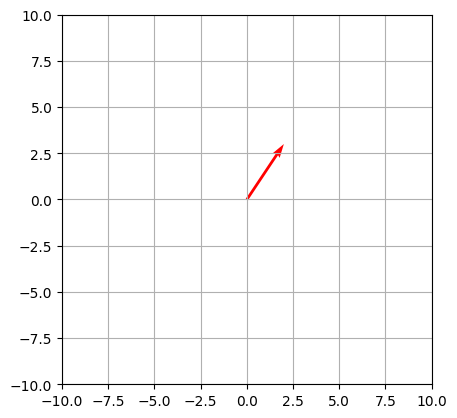

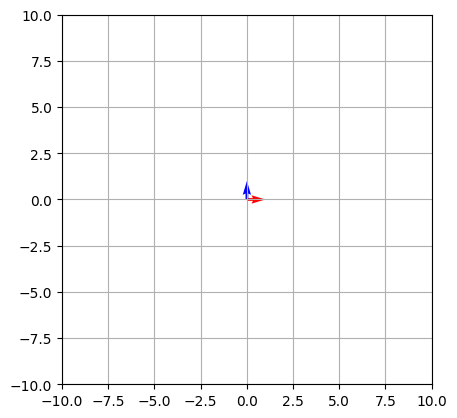

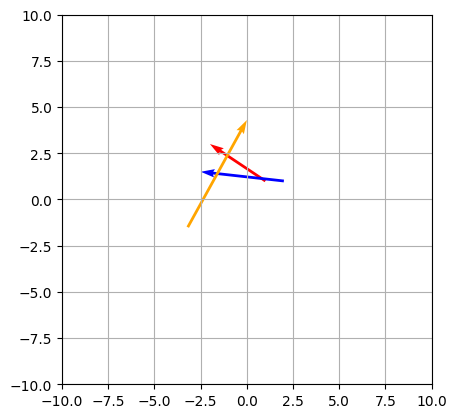

In [287]:
plot_vectors([[0, 0, 2, 3]], ["red"]) # One vector
plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"]) # Three arbitrary vectors

We know that any 2 linearly independent vectors can form a basis in 2D space. This means that every other vector can be represented as their linear combination. It will be easiest to see this in the standard basis of 2D space.

We start by defining the two basis vectors: $e_1, e_2$. Then, we choose an arbitrary vector $v$. We know that it can be expressed as a linear combination $$ v = \lambda_1e_1 + \lambda_2e_2 $$

Finding the unknown coefficients is the same as solving a linear system with as many equations as there are basis vectors (2 in this case). We can do this by using `np.linalg.solve()`.

**Note:** If you want to write `lambda` in Python for some reason, use the variable name `lamda` since `lambda` is a reserved keyword.

In [288]:
def find_linear_combination_coefficients(e1, e2, v):
    """
    Returns the coordinates of the representation of v in the basis {e_1, e_2}.
    That is, the unknown coefficients in the linear combination v = lambda_1 * e_1 + lambda_2 * e_2
    """

    A = np.array([
        [e1[0], e2[0]],
        [e1[1], e2[1]]
    ])

    v = np.array(v)

    lambdas = np.linalg.solve(A, v)

    return lambdas[0], lambdas[1]


Coefficients:  (np.float64(3.5), np.float64(8.6))


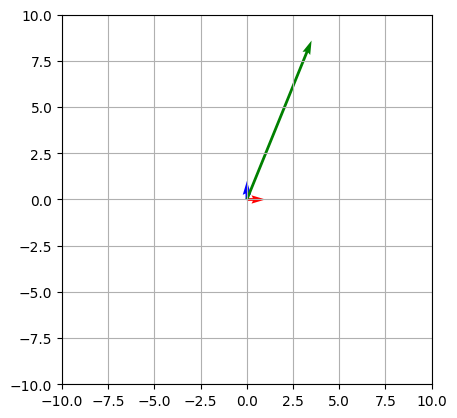

In [289]:
e1, e2 = [[1, 0], [0, 1]]
v = [3.5, 8.6]
# Find the unknown coefficients. Extract the logic in a function.
# It should accept the two basis vectors and the one we need to represent
# and should return the two coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
# Plot the three vectors
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

The coefficents should be the same as the vector's coordinates. That's because we were extremely careful in choosing a basis.

We know, however, that any pair of linearly independent vectors forms a basis in 2D space. So, let's try this.

Choose two arbitrary vectors (in the code they are `[2, 3]` and `[-5, 1]` but feel free to change them as you wish). Represent $v$ as their linear combination and print the coefficients. After that, plot the resulting vectors to verify visually that the third one is the linear combination of the other two with the coefficients that you saw.

Coefficients:  (np.float64(2.7352941176470584), np.float64(0.39411764705882335))


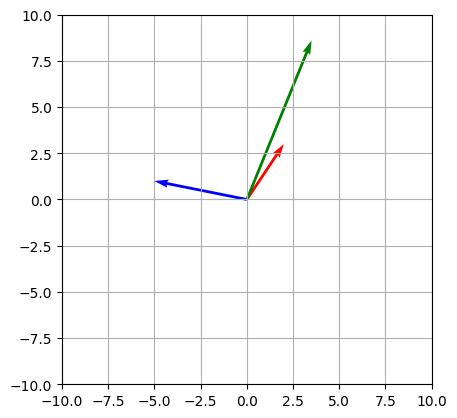

In [290]:
e1, e2 = [[2, 3], [-5, 1]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

What we did was **changing the basis**. We represented **the same original vector $v$** in the new coordinates. We didn't change the geometric object $v$ itself; it still looks the same in the plot. We only changed our viewpoint. This is what change of basis is all about: changing viewpoints.

Let's also see what an "orthogonal" basis is: the basis vectors are orthogonal to each other. You can find online how to compute orthogonal vectors but we don't need that. A definition of orthogonal vectors is: a set of two vectors $a, b$ such that $a.b = 0$. One such set of vectors is `[3, 4], [-4, 3]`.

Represent the same vector $v$ in the orthogonal basis.

Coefficients:  (np.float64(1.796), np.float64(0.47199999999999986))


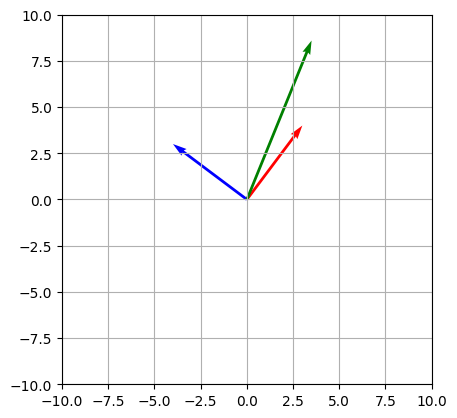

In [291]:
e1, e2 = [[3, 4], [-4, 3]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Let's choose a more visually pleasing basis: one whose basis vectors are **collinear** (parallel) to the coordinate axes.

Coefficients:  (np.float64(1.72), np.float64(0.875))


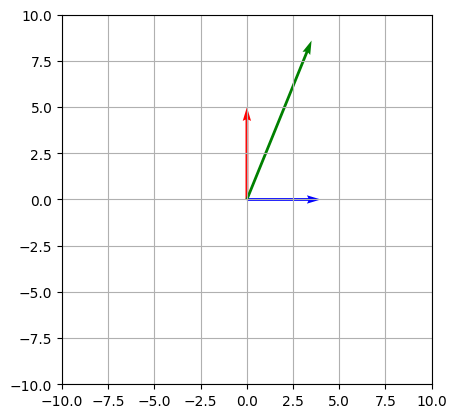

In [292]:
e1, e2 = [[0, 5], [4, 0]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Now you've seen the coordinates of $v$ in different **bases** (plural form of "basis"). You can see that algebra doesn't really care what the basis vectors are. We simply need *some* point of reference.

You can also see the transition from an arbitrary basis, to an orthogonal basis, to an orthonormal basis, to the standard basis (which is orthonormal **AND** aligned to the xy axes). You can also see that the standard basis gives us the easiest possible representation of a vector. That's why it's so useful.

### Problem 5. Vectorization in `numpy`
As programmers, we're used to writing for-loops to iterate over collections. This is quite OK but in Python makes the code slow (because it's an interpreted, dynamically-typed language). For example, a "standard" way of summing an array would be
```python
x = [2, 3, 8, -2.3, 0, 15]
python_sum = 0
for i in range(len(x)):
    python_sum += x[i]
print(python_sum)
```

However, there are better ways to do this. `numpy` works in C "behind the scenes". This means that:
1. Operations in C are very, very, VERY fast
2. Communication between C and Python is slow

This means we should prepare our code to use `numpy` arrays as much as possible. First of all, this gives us a great computational advantage: the code is very fast. Second, it will look simpler and more beautiful. Compare the previous code with this one:
```python
x = [2, 3, 8, -2.3, 0, 15]
numpy_sum = np.sum(x)
print(numpy_sum)
```

Of course, the for-loop is still done, it's just hidden.

The basic rule is **whenever possible, avoid looping and use vectors and matrices**. Sometimes it's impossible to avoid loops and that's OK.

Let's create a performance test. Create a large array of random numbers. You can use `np.random.random()`. Sum the array using `numpy` and using the for-loop. Compare the times. In some cases, the performance difference will be several hundred times (e.g. length = $1.10^7$, difference $\approx 2000$ times: $\approx 0.01ms$ for the `sum()` and $\approx 2s$ for the loop).

Don't forget to see that the sums are equal. A fast but incorrect algorihm is not an option :).

Next, call the function for different lengths and create two plots showing the time it takes to multiply different-length arrays. **Idea:** You can plot them on two separate y-axes on the same plot. Look at the `twiny()` function. See how much time it takes to perform both operations.

Plot another plot: speedup versus length. Plot the length on the x-axis and the speedup (`np_sum_time / for_loop time`) on the y-axis.

In [293]:
np_array = np.random.random(100000000)

In [294]:
start = time.perf_counter()
res1 = np_array.sum()
end = time.perf_counter()
a = end - start
print(f"Needed time to compute the sum is {a} sec")

Needed time to compute the sum is 0.048231499999019434 sec


In [295]:
start = time.perf_counter()
result = 0
for n in np_array:
    result += n
end = time.perf_counter()
b = end - start
print(f"Needed time to compute the sum is {b} sec")

Needed time to compute the sum is 8.891742499999964 sec


In [296]:
print("NumPy:", a)
print("For-loop:", b)
print("Times slower:", b / a)

NumPy: 0.048231499999019434
For-loop: 8.891742499999964
Times slower: 184.35550418669825


Using np.array to calculate the sum of the number is ~133 faster than regular for-loop

There's one slight warning to using vectors. If we don't know what we're doing we might get very hard-to-detect bugs.

Let's look at vector multiplication. In algebra we may write:
$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

This is the same as
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=16$$

In vector multiplication, rows and columns don't really matter. However, most of the time we want to use **the matrix convention**: "rows times columns". This means that both products above are undefined. Also, the inner product is
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}
.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

The inverse operation, following our convention, will return a matrix (this is called **outer product**):

$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=
\begin{bmatrix}
10 & -4 & 6 \\
15 & -6 & 9 \\
20 & -8 & 12
\end{bmatrix}$$

Let's compare how the default `numpy` behaviour does and how we can impose our convention.

First, let's create the arrays. Next, multiply them. Everything should look fine... until we look at the shapes of `x` and `y` which are `(3,)`. This kind of array is called **rank-1 array**. The matrix convention **DOES NOT** apply to it. One big error is evident when we try to transpose them.

In [297]:
x = np.array([2, 3, 4])
y = np.array([5, -2, 3])
print("x.y =", str(x.dot(y)))

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x:", x)
print("x transpose:", x.T)

x.y = 16
x.shape: (3,)
y.shape: (3,)
x: [2 3 4]
x transpose: [2 3 4]


Transposition **DID NOT** turn our row-vector into a column vector! This is correct but **does not follow the matrix convention**.

How do we follow the matrix convention then? Simple, just represent the vectors as matrices (2D arrays).

In [298]:
x = np.array([[2, 3, 4]]) # Row vector
y = np.array([[5], [-2], [3]]) # Column vector

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x.y:\n", x.dot(y)) # Dot product -> still looks like a matrix
print("y.x:\n", y.dot(x)) # Outer product -> matrix

x.shape: (1, 3)
y.shape: (3, 1)
x.y:
 [[16]]
y.x:
 [[10 15 20]
 [-4 -6 -8]
 [ 6  9 12]]


This simple convention can save us a lot of trouble in the future, especially when dealing with more complicated code.

### Problem 6. Visualizing Linear Transformations
Write a code which visualizes a linear transformation. It should show "the old space" and "the new space" imposed on it.

Actually, if you don't want to write the code, I've already provided something for you. The following cell contains the `visualize_transform.py` code from last time. We'll examine it and see how we can use it to show our own transformations.

In [299]:
def visualize_transformation(matrix, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", angles = "xy", scale = 1)
   
    plt.show()

The code is mostly "housekeeping" - making the plot look nicer. It basically consits of several parts:
1. Visualize gridlines
2. Create the transformation from the matrix: `t = Affine2D(matrix)`
3. Visualize transformed gridlines

A quirk with `Affine2D()` is that it uses a 3x3 matrix. What's more, the last row is always `[0, 0, 1]`. This is because the third column corresponds to moving (translation) of the entire coordinate system. As you can imagine, this doesn't leave the origin fixed, therefore **translation is not a linear transformation**. It's an affine transformation, which is exactly what the code does. More info [here](https://stackoverflow.com/questions/10698962/why-do-2d-transformations-need-3x3-matrices).
For our purposes, we defined the 2D transformation matrix as:
$$ T=\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} $$
which we'll pass to the function as
$$ T=\begin{bmatrix}
a & b & 0 \\
c & d & 0 \\
0 & 0 & 1
\end{bmatrix} $$

**Note:** If you want to visualize translations, feel free to do so.

Let's see what various transformations look like.

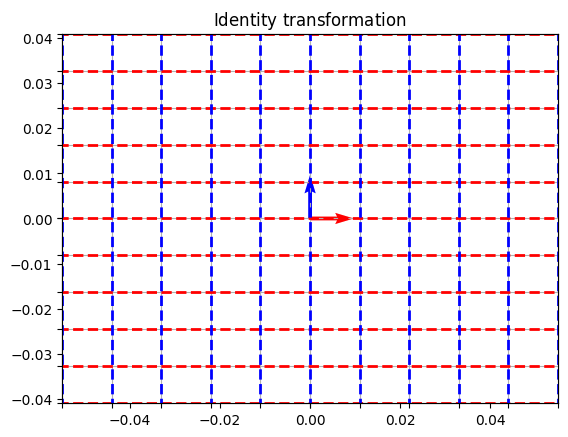

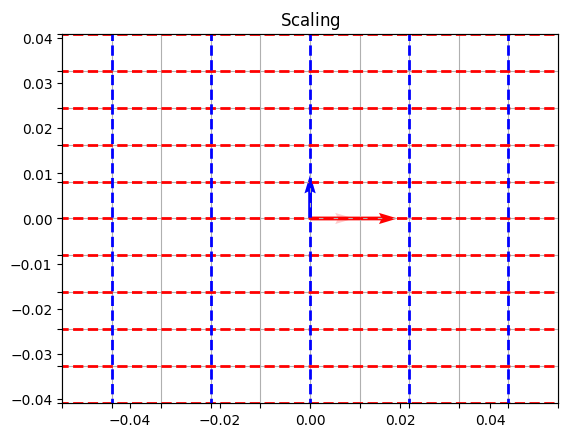

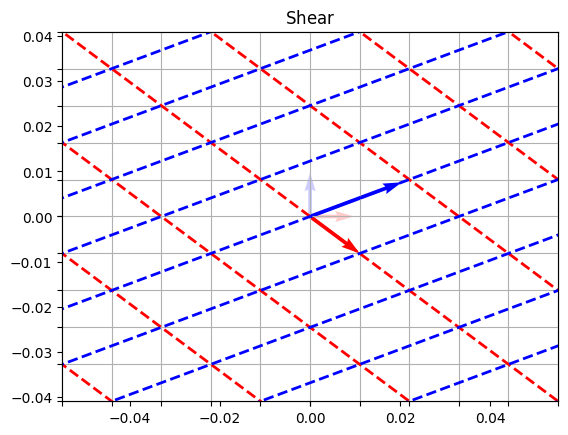

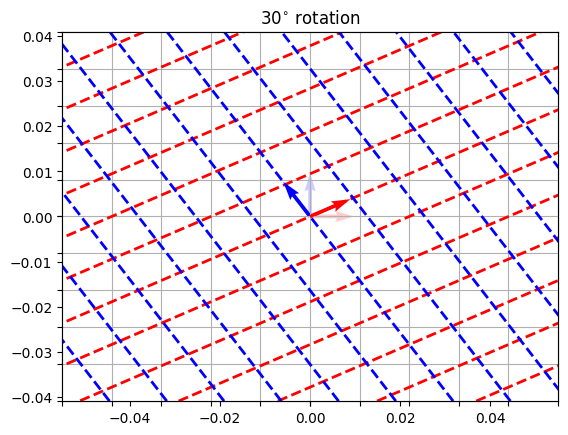

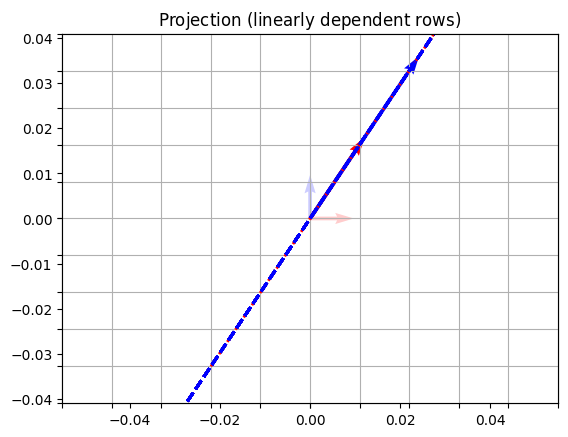

In [300]:
# Identity
matrix = [
    [1, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Identity\ transformation}$")

# Scaling
matrix = [
    [2, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")

# Shear
matrix = [
    [1, 2],
    [-1, 1]
]

visualize_transformation(matrix, r"$\mathrm{Shear}$")

# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30))],
    [np.sin(np.radians(30)), np.cos(np.radians(30))]
]

visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

# Projection (linearly dependent rows)
matrix = [
    [1, 2],
    [2, 4]
]

visualize_transformation(matrix, r"$\mathrm{Projection\ (linearly\ dependent\ rows)}$")

Feel free to experiment with other matrices and to see what transformation they will result in. Also feel free to write better visualization code.

In [301]:
m1 = [
    [1, 32],
    [2, 4]
]

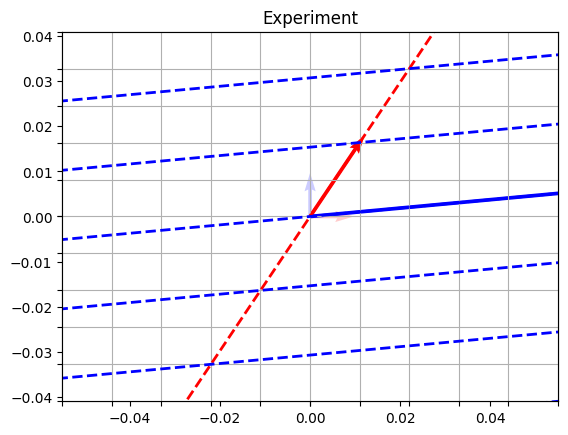

In [302]:
visualize_transformation(m1, r"Experiment")

### Problem 7. Images as Matrices. Image arithmetic
One direct use of matrices and transformations is images. An image is a 2D array (i.e. matrix) of pixels. If it's grayscale, each pixel will be an integer from 0 to 255:
$$ I=\begin{bmatrix}
20 & 45 & 83 & \dots \\
38 & 182 & 200 & \dots \\
\dots & \dots & \dots & \dots \\
\end{bmatrix} $$

In an RGB image, each pixel contains three values, corresponding to $R$, $G$ and $B$.

A bigger number means more brightness in the corresponding channel, for example `[255, 0, 0]` is a completely red pixel. `[0, 0, 0]` is a black pixel, and `[255, 255, 255]` is a white pixel.

Because we treat images as matrices, we can peform arithmetic operations on them.

To show an image, you can use `plt.imshow()`.

#### Opening an image from the Internet
This one proves not to be easy. However, there's a library for working with images called `scikit-image` which solves most of our problems. Even better, it returns a `numpy` array, which is perfect for us.

In [303]:
def read_image(url):
    img = skimage.io.imread(url)
    return img

In [304]:
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
cat_image[0][0] # First pixel

In [ ]:
plt.imshow(cat_image)
plt.axis("off")
plt.show()

In most cases, it's useful to treat the channels one by one.

In [ ]:
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]
f, (ax_r, ax_g, ax_b) = plt.subplots(1, 3, figsize = (10, 5))
ax_r.imshow(cat_image_r, cmap = "gray")
ax_r.set_title("Red channel")
ax_g.imshow(cat_image_g, cmap = "gray")
ax_g.set_title("Green channel")
ax_b.imshow(cat_image_b, cmap = "gray")
ax_b.set_title("Blue channel")
plt.setp([ax_r, ax_g, ax_b], xticks = [], yticks = []) # Remove axis ticks
plt.show()

If we simply add the channels together, without making them red, green or blue, we'll get a grayscale image. Note that this doesn't appear very pleasing. This is because the human eye perceives different colors differently.

Note that we first need to "normalize" each channel, that is, divide by 255. This will rescale all values. Instead of $[0; 255]$, they'll be in the range $[0; 1]$.

In [ ]:
cat_image_r_normalized, cat_image_g_normalized, cat_image_b_normalized = [
    channel / 255 for channel in [cat_image_r, cat_image_g, cat_image_b]
] 
cat_image_gray = (cat_image_r_normalized + cat_image_g_normalized + cat_image_b_normalized) / 3.0  
plt.imshow(cat_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

The eye is more sensitive to greens than reds or blues. There are several ways to apply that correction, but we'll use [this one](https://stackoverflow.com/questions/14330/rgb-to-monochrome-conversion). This is called **luminance correction** (or **gamma correction**).

In [ ]:
cat_image_gray_corrected = (0.299 * cat_image_r_normalized + 
                            0.587 * cat_image_g_normalized + 
                            0.114 * cat_image_b_normalized)
plt.gca().imshow(cat_image_gray_corrected, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()

If we want to create an artistic grayscale image, we can always change the coefficients. Feel free to experiment with this.

So, there we go. We just performed matrix operations on images. Later, we'll talk about matrix multiplication and convolution, which is a very cool way of processing images.

For the time being, let's just try one more thing. The **image histogram** will give us information of how bright our image is. On the x-axis, there are pixel values from 0 to 255. On the y-axis, there is the count of all values, for example 10 pixels with value 0, 30 pixels with value 1 and so on.

In [ ]:
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black")
plt.title("Uncorrected image histogram")
plt.show()
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

In [ ]:
# Represent the image as a single-dimensional vector
hist_vector = cat_image_gray.ravel()

# Normalize the image to have values in the range [0; 1]
hist_vector = hist_vector / (hist_vector.max() - hist_vector.min())

plt.hist(hist_vector, bins = 256, color = "black", alpha = 0.5, label = "Uncorrected")
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Corrected")
plt.xlim(0, 1)
plt.title("Image histograms comparison")
plt.legend()
plt.show()

**Your turn.** Using the code above, display each image channel (1 row, 3 columns). Below each channel, show the histogram corresponding to that channel. Use the previous code pieces as a reference.

In [ ]:
# Write your code here

### Problem 8. Eigenvalues and Eigenvectors
Some transformations are special. Let's examine this visually.

Modify the code in the transformation visualization example. Instead of the two basis vectors, it should now accept **a vector as a parameter** and it should show that vector in the old and new coordinates. This should be simple enough to do :).

In [ ]:
def visualize_transformed_vector(matrix, vec, title):
    """
    Shows the vector (starting at (0, 0)) before and after the transformation
    given by the specified matrix
    """

    matrix = np.array(matrix)
    vec = np.array(vec)

    transformed_vec = matrix @ vec

    plt.figure()

    # Original vector
    plt.quiver(0, 0, vec[0], vec[1],
               angles='xy', scale_units='xy', scale=1, label='Original vector', color='b')

    # Transformed vector
    plt.quiver(0, 0, transformed_vec[0], transformed_vec[1],
               angles='xy', scale_units='xy', scale=1, label='Transformed vector', color='r')

    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.axhline(0)
    plt.axvline(0)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.title(title)
    plt.legend()

    plt.show()

Now have a look at the matrix given below:
$$ T = \begin{bmatrix}
2 & -4 \\
-1 & -1
\end{bmatrix} $$

See how the transformation acts on a arbitrary vector:

In [ ]:
matrix = np.array([[2, -4, 0], [-1, -1, 0], [0, 0, 1]])
visualize_transformed_vector(matrix, [2, 3, 1], "Transformation")

Well, it... transforms it somehow. Let's try another vector:

In [ ]:
visualize_transformed_vector(matrix, [-4, 1, 1], "Transformation")

Hm... the vector should be **scaled only**. That is, the entire matrix multiplication acts like a scalar multiplication for this special vector. Because it's so special, it's given a name - it's an **eigenvector** of that matrix. The factor which scales it is called an **eigenvalue** corresponding to that eigenvector.

More formally, a vector $v$ is an eigenvector of the matrix $A$, corresponding to the eigenvalue $\lambda$ if
$$ Av = \lambda v $$

You can find more details about the computation [here](https://www.calvin.edu/~scofield/courses/m256/materials/eigenstuff.pdf).

Why are these useful? For example, all of quantum physics is based on eigenvalues and eigenvectors. Also, it's very useful in **dimensionality reduction** problems. If you wish, you can explore that (for example, the principal component analysis algorithm).

### * Problem 9. Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

### ** Problem 10. Principal Component Analysis
Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions **while keeping the most important shapes and structures** is called **principal component analysis** (PCA). You can explore this using the following checklist:
* What are eigenvalues and eigenvectors?
* What is the eigenbasis? What is the spectrum of a matrix?
* How do we compute the eigenvalues and eigenvectors of a matrix?
* What is projection?
* How does projection conserve some shapes? Think about an object casting a shadow
* How is the projection problem related to eigenvalues and eigenvectors?
* What is PCA?
* What are principal components? How many components are there (as a function of dimensions of the original space)?
* What is variance? What is explained variance?
* How do principal components relate to explained variance?
* How is PCA implemented? Implement and show
* Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
* Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.

In [ ]:
# Step 1 - create a matrix
matrix = np.array([
    [10, 3, 18, 25, 33],
    [5, 18, 9, 4, 38],
    [10, 10, 22, 44, 27],
    [5, 19, 62, 44, 17],
])
matrix

In [ ]:
# Calculate mean value of every feature
mean_feature_vector = []
for x in matrix.T:
    mean_feature_vector.append(x.mean())
    print(f"Mean value of every feature:  {x.mean()}")

In [ ]:
# Finding a centered matrix
centered_matrix = matrix - mean_feature_vector

$$\Large X_{centered} = X - \mu $$
$$ X - \text{original matrix (n x d)} $$
$$ \mu - \text{vector with mean value of every feature} $$

$$\Large \mu_j = \frac{1}{n}\sum_{i=1}^nX_{ij} $$

In [ ]:
centered_matrix

In [306]:
centered_matrix.T @ centered_matrix

array([[  25.  ,  -60.  ,  -77.5 ,   52.5 ,   12.5 ],
       [ -60.  ,  169.  ,  226.5 ,  -39.5 ,  -61.5 ],
       [ -77.5 ,  226.5 , 1652.75,  935.25, -607.25],
       [  52.5 ,  -39.5 ,  935.25, 1090.75, -450.75],
       [  12.5 ,  -61.5 , -607.25, -450.75,  244.75]])